# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [190]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [191]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

## Visualize
For machine learning data, the first priority is to check the distribution of the data, of which are images.

(array([  60.,  720.,  750.,  450.,  660.,  630.,  150.,  450.,  450.,
         480.,  660.,  420.,  690.,  720.,  270.,  210.,  150.,  360.,
         390.,   60.,   90.,   90.,  120.,  150.,   90.,  480.,  180.,
          60.,  150.,   90.,  150.,  270.,   60.,  210.,  120.,  390.,
         120.,   60.,  690.,   90.,   90.,   60.,   90.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.13953488,  37.11627907,  38.09302326,
         39.06976

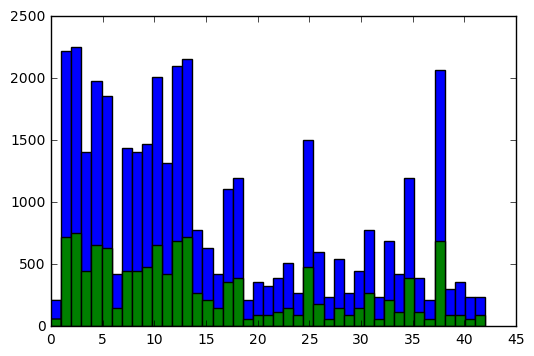

In [192]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# form histgram based on the input data
plt.hist(y_train, bins = n_classes)
plt.hist(y_test, bins = n_classes)

Based on the plot above, the distribution of dataset is skewed, which will casue certain issue in the future, which will be fixed next.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [193]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2

# iterate through grayscale input images
def preprocess(input):
    grayed_img = []
    for img in input:
        grayed = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        grayed_img.append(grayed)
    return np.array(grayed_img)

# normalize input images pixels in between (-1,1) from in between 0 and 255  
def normalize(input):
    input = input.astype(np.float32)
    input = input / 128 - 1
    return input

In [194]:
# add a new dimension to datasets
from numpy import newaxis

# process training dataset
print('preprocessing training data...')
X_train = preprocess(X_train)
X_train = X_train[..., newaxis]
X_train = normalize(X_train) 
print('finished preprocessing training data.')
image_shape_train = X_train.shape
print("processed training data shape =", image_shape_train)

# process testing dataset
print('preprocessing testing data...')
X_test = preprocess(X_test)
X_test = X_test[..., newaxis]
X_test = normalize(X_test) 
print('finished preprocessing testing data.')
image_shape_test = X_test.shape
print("processed testing data shape =", image_shape_test)

print('all data preprocessing complete.')

preprocessing training data...
finished preprocessing training data.
processed training data shape = (39209, 32, 32, 1)
preprocessing testing data...
finished preprocessing testing data.
processed testing data shape = (12630, 32, 32, 1)
all data preprocessing complete.


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** First step of preprocessing dataset is to greyscale the input color images, which reduces the input channels from 3 to 1 and renders a less complex input dataset for pipeline processing. Then to correct the disadvantage of OpenCV cv2 function, flattening the input to two dimensions, Numpy newaxis function has been invoked to generate one additional dimension. Second, normalizing has been introduced to minimize the instablility of edge-to-edge numerical calculations, by making pixel's values to a relative unit range from -1 to 1.

In [195]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# add more data to input set
from scipy import ndimage
import random

# get the mean of traing lables
pics_in_class = np.bincount(y_train)
mean_pics = int(np.mean(pics_in_class))
min_desired = int(mean_pics)
print('Generating new data.')
angles = [-10, 10, -15, 15, -20, 20]    # angles required to rotate image

for i in range(len(pics_in_class)):
    
    # check if less data than the mean
    if pics_in_class[i] < min_desired:
        
        # count how many additional images are needed
        add_img = min_desired - pics_in_class[i]
        picture = np.where(y_train == i)
        more_X = []
        more_y = []
        
        # make the number of additional images needed to arrive at the mean
        for num in range(add_img):
            
            # rotate images and append new ones to more_X, append the class to more_y
            more_X.append(ndimage.rotate(X_train[picture][random.randint(0,pics_in_class[i] - 1)], random.choice(angles), reshape=False))
            more_y.append(i)
        
        # append the images generated for each class back to the original data
        X_train = np.append(X_train, np.array(more_X), axis=0)
        y_train = np.append(y_train, np.array(more_y), axis=0)
        
print('Additional data generated. Any classes lacking data now have', min_desired, 'pictures.')

Generating new data.
Additional data generated. Any classes lacking data now have 911 pictures.


Plot dataset distribution after the modification.

modified training examples numbers = 52396


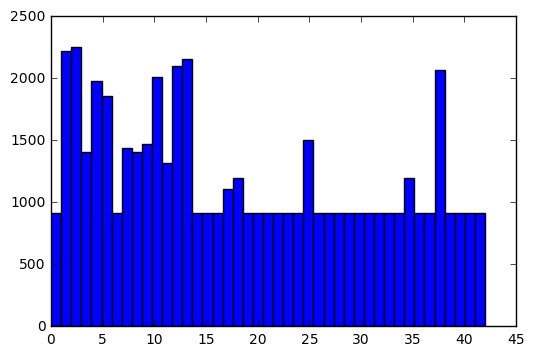

In [196]:
plt.hist(y_train, bins = n_classes)
train_new = len(X_train)
print("modified training examples numbers =", train_new)

Now the classes have been arranged around the its mean. There are more than sufficient data to help avoiding overfittng.

In [197]:
# split validation data from training data
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify = y_train, test_size=0.1, random_state=23)

print('dataset successfully split for training and validation.')

dataset successfully split for training and validation.


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** Each class has been added more images to pull images below the mean up to the mean. The additional images are added by rotating using ndimage.rotate function according to their proper angles. After iterations, the modified histgram ends up more treading towards the mean of dataset. Then the training dataset has been shuffled randomly. Fourthurmore, the validation dataset has been split from the training dataset by function train_test_split. The generated validation dataset is 10 percent of modified training dataset.

In [198]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

# reset the notebook
tf.reset_default_graph()

EPOCHS = 10
BATCH_SIZE = 150

from tensorflow.contrib.layers import flatten

def neural_network(x):    
    # hyperparameters
    mu = 0
    sigma = 0.1
    
    # Convolutional Layer 1: convert from 32x32x1 to 28x28x6
    # shape[2]=1 instead of 3 due to grayscaling
    c1_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 1, 6), mean = mu, stddev = sigma))
    c1_bias = tf.Variable(tf.zeros(6))
    c1 = tf.nn.conv2d(x, c1_weight, strides=[1, 1, 1, 1], padding='VALID') + c1_bias
    # activation for layer 1
    c1 = tf.nn.relu(c1)
    # Subsampling 1: average pooling, convert from 28x28x6 to 14x14x6
    c1 = tf.nn.avg_pool(c1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Convolutional Layer 2: convert from 14x14x6 to 10x10x16
    c2_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16), mean = mu, stddev = sigma))
    c2_bias = tf.Variable(tf.zeros(16))
    c2 = tf.nn.conv2d(c1, c2_weight, strides=[1, 1, 1, 1], padding='VALID') + c2_bias
    # activation for layer 2
    c2 = tf.nn.relu(c2)
    # Subsampling 2: average pooling, convert from 10x10x16 to 5x5x16.
    c2 = tf.nn.avg_pool(c2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # flatten from 3D layer 5x5x16 to fully connected layer 400
    flat = tf.contrib.layers.flatten(c2)
    
    # Fully Connected Layer 1: convert from 400 to 200
    fc1_weight = tf.Variable(tf.truncated_normal(shape = (400, 200), mean = mu, stddev = sigma))
    fc1_bias = tf.Variable(tf.zeros(200)) 
    fc1 = tf.matmul(flat, fc1_weight) + fc1_bias     # matrix multiplication instead of 2D convolution
    # activation for fully-connected layer 1
    fc1 = tf.nn.relu(fc1)
    # dropout to prevent overfitting
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Fully Connected Layer 2: convert from 200*keep_prob to 100
    fc2_weight = tf.Variable(tf.truncated_normal(shape = (200, 100), mean = mu, stddev = sigma))
    fc2_bias = tf.Variable(tf.zeros(100))
    fc2 = tf.matmul(fc1, fc2_weight) + fc2_bias
    # activation for fully-connected layer 2
    fc2 = tf.nn.relu(fc2)
    # dropout to prevent overfitting
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Fully Connected Layer 3: convert from 100*keep_prob to 43
    fc3_weight = tf.Variable(tf.truncated_normal(shape = (100, 43), mean = mu, stddev = sigma))
    fc3_bias = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_weight) + fc3_bias
    
    return logits

In [199]:
# set placeholder variables for x, y
# keep_prob for dropout
# one-hot encode y
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [200]:
# set learning rate, loss functions, and optimizer
rate = 0.005

logits = neural_network(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [201]:
# validation part of the neural network
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy =  sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** Mimiced from LeNET neutral network, this network has two convolutional layers and three fully connected layers. After several attempts, this setups of layers do yield better accuracy mostly. To gain better accuracy, dropout method has been deployed; this dropout method at 0.7 probability has minimized an overfitting situation on this dataset. Also, using max pooling instead of average pooling yields slightly degree of accuracy too. All training dataset are trained under depth as grayscaled 1 rather than colored 3.

In [202]:
### Train your model here.
### Feel free to use as many code cells as needed.

save_file = 'train_model.ckpt'
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            loss = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.7})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("validation accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    # Save the model
    saver.save(sess, save_file)
    print('trained model is saved.')

training...

EPOCH 1 ...
validation accuracy = 0.895

EPOCH 2 ...
validation accuracy = 0.947

EPOCH 3 ...
validation accuracy = 0.969

EPOCH 4 ...
validation accuracy = 0.970

EPOCH 5 ...
validation accuracy = 0.981

EPOCH 6 ...
validation accuracy = 0.982

EPOCH 7 ...
validation accuracy = 0.970

EPOCH 8 ...
validation accuracy = 0.981

EPOCH 9 ...
validation accuracy = 0.984

EPOCH 10 ...
validation accuracy = 0.986

trained model is saved.


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**  Function AdamOptimizer has been used from TensorFLow to optimize the lost function. Batch size at 150 seems to perform better than other sizes at gaining accuracy. Due to the time and computational power limits, epoch sets at 10, whcih yields nearly 97% to 98% validation accuracy. More epoch setting will only exhaust the computer and gain marginal accuracy. Keeping a mean at 0 and equal variance satisfy the stability the training needed to improve the accuracy.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** Each parameter has been tuned to get a better fit on accuracy. Learning rate at 0.005, batch size at 150 and 10 epochs, definitely yield a better potential answer. The LeNet 2+3 layers network has also generate better accuracy than other combinations.

One-Variable Test Results:

@ LeNet, epochs=10, batch size=150, learning rate=

  0.1 yields 0.043 accuracy
  
  0.01 yields 0.956 accuracy
  
  0.005 yields 0.984 accuracy
  
  0.001 yields 0.972 accuracy
  
@ LeNet, epochs=10, learning rate =0.005, batch size=

  50 yields 0.042 accuracy
  
  150 yields 0.984 accuracy
  
  200 yields 0.962 accuracy
  
@ epochs=10, batch size=150, learning rate=0.005, network setups:

  1 convolutional, 2 fully connected = .901
  
  1 convolutional, 3 fully connected = .935
  
  2 convolutional, 2 fully connected = .979
  
  2 convolutional, 3 fully connected = .984
  
Consider all the variables above, the combination of the above four factors takes huge influence on accuracy.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

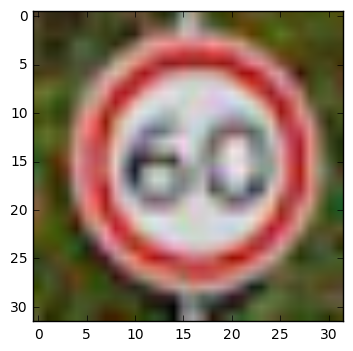

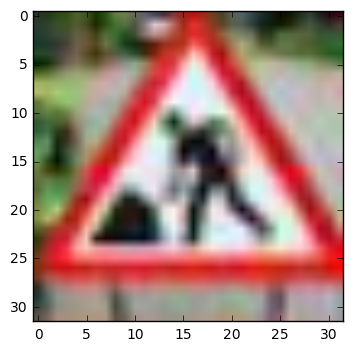

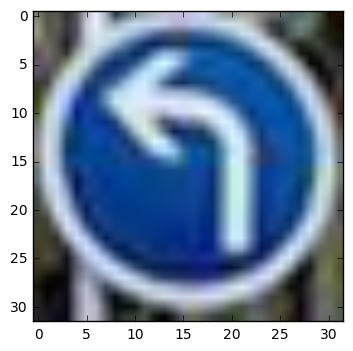

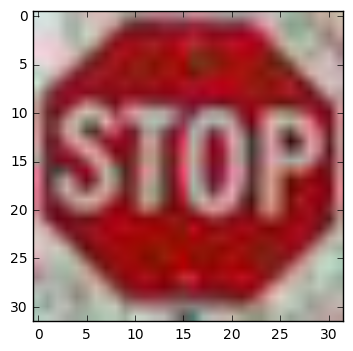

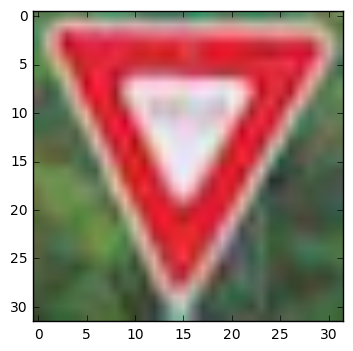

In [203]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import matplotlib.image as mpimg

pics = os.listdir("pics/")
pics = pics[0:5]

# Show the images, add to a list to process for classifying
add_pics = []
for i in pics:
    i = 'pics/' + i
    image = mpimg.imread(i)
    add_pics.append(image)
    plt.imshow(image)
    plt.show()

In [204]:
# convert into numpy array for processing
add_pics = np.array(add_pics)

# double-check the image shape to make sure it matches the original data's 32x32x3 size
print(add_pics.shape)

(5, 32, 32, 3)


In [205]:
print('preprocessing additional images...')

# Iterate through grayscale
add_pics_data = preprocess(add_pics)
add_pics_data = add_pics_data[..., newaxis]

# Normalize
add_pics_data = normalize(add_pics_data) 

print('completed preprocessing additional images.')

# Double-check that the image is changed to depth of 1
new_image_shape = add_pics_data.shape
print("additional images shape after preprocessing", new_image_shape)

preprocessing additional images...
completed preprocessing additional images.
additional images shape after preprocessing (5, 32, 32, 1)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** The five images, construction, left-turn, speed, stop and yield signs, have been added showing different level of confidency on the training model. Despite low resolution of the images, the model above should pick up certain patterns without too much compensation on resolution.

In [206]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

# process images using above trained model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    new_pics_classes = sess.run(logits, feed_dict={x: add_pics_data, keep_prob : 1.0})

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**  This model shows only 60% of accuracy with 60-Speed-Limit, Left-Turn and Yield sign being identified even after several training process. The other two unrecognized results can be concluded from low resolution of image inputs or model imperfection. This result is bit lower than the actual training set result due to the limitation of the low resolution images being used. 

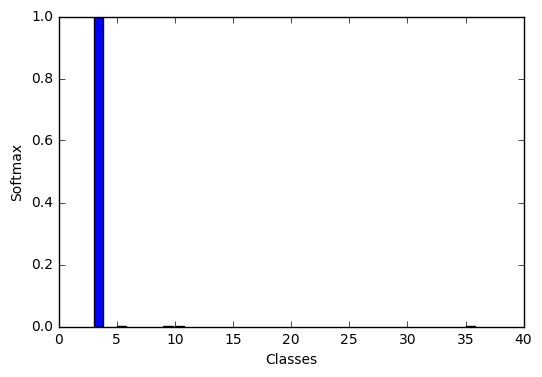

Image 0 probabilities: [  9.98194993e-01   1.80279335e-03   1.04334435e-06   9.33030435e-07
   1.09509294e-07] 
 and predicted classes: [ 3  9 10  5 35]


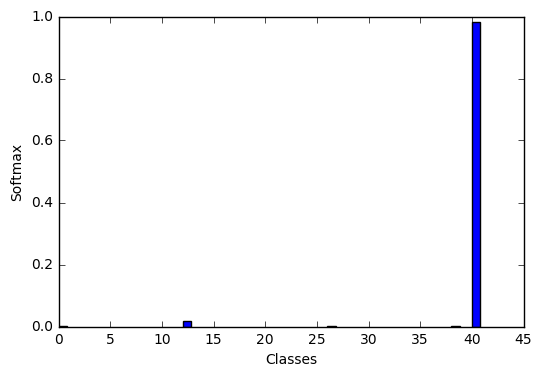

Image 1 probabilities: [  9.81613994e-01   1.82975251e-02   8.57404521e-05   1.54851898e-06
   5.66013512e-07] 
 and predicted classes: [40 12  0 26 38]


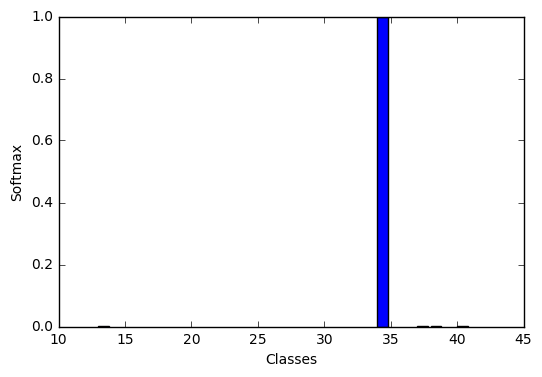

Image 2 probabilities: [  9.99373496e-01   5.70737408e-04   2.85807728e-05   2.68070125e-05
   3.47239165e-07] 
 and predicted classes: [34 37 38 13 40]


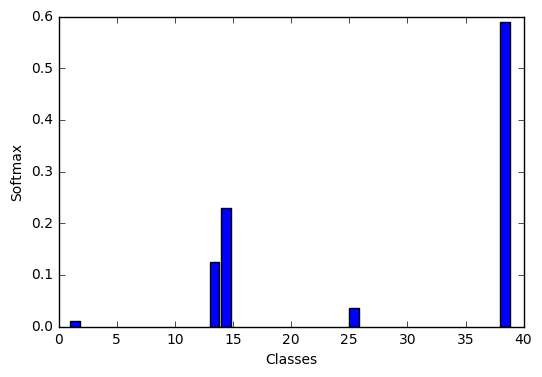

Image 3 probabilities: [ 0.58898789  0.22969577  0.12412246  0.0367373   0.00975141] 
 and predicted classes: [38 14 13 25  1]


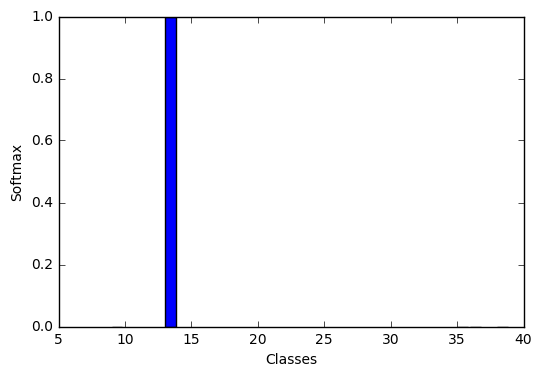

Image 4 probabilities: [  1.00000000e+00   4.10579038e-17   9.60934229e-18   2.66633673e-22
   8.37781168e-24] 
 and predicted classes: [13  9 35 38 36]


In [210]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    predicts = sess.run(tf.nn.top_k(tf.nn.softmax(new_pics_classes), k=5, sorted=True))
    
for i in range(len(predicts[0])):
    plt.bar(predicts[1][i], predicts[0][i])
    plt.xlabel('Classes')
    plt.ylabel('Softmax')
    plt.show()
    print('Image', i, 'probabilities:', predicts[0][i], '\n and predicted classes:', predicts[1][i])

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**  There are three images being identified after training for CERTAIN, the 60 Speed Limit, the Left-Turn and the Yield sign. 

The first image, Speed Limit @ 60, has been identified as the softmax top one probability. This means the model is grasping plenty patterns to generate enough informationon from the input image.

The second image, Road Work, has not been identified as the softmax along all the probability, meaning the model above has not receiving the correct patterns to recognize the image and/or the low resolution of image quality.

The third and fifth images, Left-Turn and Yield, have been identified mostly due to the same reason as the first image.

The fourth image, Stop, has not been identified as the softmax top one probability, but rather the second probability; which means for this class, the model has been well trained to have enough information to recognize the image, but due to low resolution of the input images, the result is uncertain to show.

Overall, trained model only has 60% accuracy on identifying images. This result is way off from the validated accuracy on the training dataset due to : first, the low resolution of input images; second, trained model parameters still require more tuning; third, the limitaion on computational power this model trained on.



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.